# Forberedelsen af data

In [11]:
#Libriaries & Models
import matplotlib
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Layer, LSTM, Dense
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.utils import get_custom_objects
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import time


from IPython.display import clear_output
from skimage.io import imread
from skimage.transform import resize

from scipy.spatial.distance import cdist
from scipy.linalg import pinv
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error

import os
import pickle

import importlib
import src
importlib.reload(src)

Python random seed set.
NumPy random seed set.
TensorFlow (Keras) random seed set.


<module 'src' from '/Users/hugojohnson/Desktop/Deep Learning/02456-deep-learning-project/src/__init__.py'>

Access the datasets

Data handling

In [17]:
X_train, X_test, y_train, y_test, scaler_X, scaler_y = src.dataset.load_split_data(shuffle=False)
print(X_train.shape)
print(y_train.shape)

Loaded from pickle
(1280004, 6)
(1280004, 3)


# KNN Model

In [18]:
# Step 2: KNN Model
# Initialize KNN regressor with k neighbors (hyperparameter to tune)
k = 10  # You can tune this
knn = KNeighborsRegressor(n_neighbors=k, metric='euclidean')

# Fit the model
knn.fit(X_train, y_train)

# Step 3: Prediction
y_pred_scaled = knn.predict(X_test)

# Inverse transform the scaled predictions
y_pred_scaled = scaler_y.inverse_transform(y_pred_scaled)
y_test_scaled = scaler_y.inverse_transform(y_test)

# Step 4: Evaluation
mse = mean_squared_error(y_test_scaled, y_pred_scaled)
print(f"Mean Squared Error: {mse:.4f}")

Mean Squared Error: 384.5316


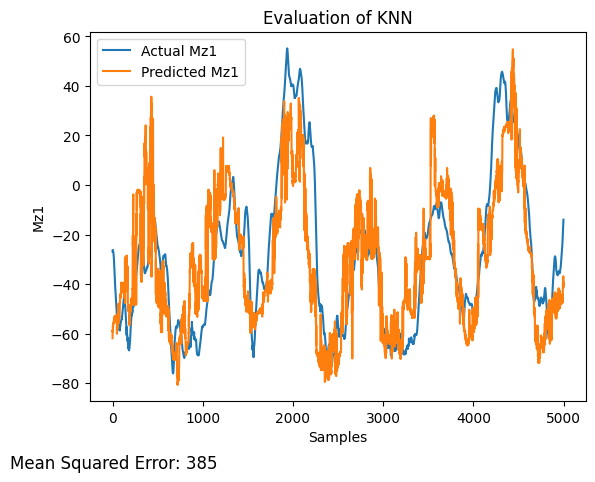

In [20]:
start = 0
# for i in range(10):
src.plots.evaluate_predictions(y_pred_scaled[:, 0][start:start+5000], y_test_scaled[:, 0][start:start+5000], mse=mse, name=f"KNN")
# start += 100

In [15]:
# entry = 20

# guess = knn.predict(X_test[entry])

# # Inverse transform the scaled predictions
# guess = scaler_y.inverse_transform(guess)
# actual = scaler_y.inverse_transform(y_test[entry])

# print("Guess: " + str(guess))
# print("Actual: " + actual)

# # Step 4: Evaluation
# mse = mean_squared_error(y_test, y_pred_scaled)
# print(f"Mean Squared Error: {mse:.4f}")

# # Optionally, use the model for new predictions:
# new_X = np.array([[value1, value2, ..., value6]])
# new_X_scaled = scaler_X.transform(new_X)
# prediction_scaled = knn.predict(new_X_scaled)
# prediction = scaler_y.inverse_transform(prediction_scaled)